# TUDataset Social Net

In [216]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from reserch_utils_HT import degree_hist, draw_origin

In [180]:
from PIL import Image

def network_to_image(G, sort=False, shuffle=False, seed=None):
    def _sort_by_degree(A, G):
        # 隣接行列を次数の昇順に並び替える
        # 次数の辞書を取得
        degs = dict(G.degree())
        # value(次数)で並び替え
        sort_degs = sorted(degs.items(), key=lambda x: x[1])
        sort_nodes = [node[0] for node in sort_degs]
        # 行, 列並び替え
        A = A[:, sort_nodes]
        A = A[sort_nodes, :]
        return A

    # 隣接行列の作成
    A = nx.to_numpy_array(G)
    # shuffle
    if shuffle:
        A = _shuffle(A, seed)
    # sort
    if sort:
        A = _sort_by_degree(A, G)
    # array to image
    img = Image.fromarray(A * 255).convert("L")
    return img

def make_graph(graph_index,graph_indicator,edges_list):
    # node id list
    node_ids = np.where(graph_indicator == graph_index)[0]
    # edge抽出
    edges = []
    for e in edges_list:
        if e[0] in node_ids and e[1] in node_ids:
            edges.append(e)
    
    # make graph
    G = nx.DiGraph()
    G.add_nodes_from(node_ids)
    G.add_edges_from(edges)
    
    print(f"index: {graph_index}, node: {nx.number_of_nodes(G)}, edges: {nx.number_of_edges(G)}")
    return G

In [ ]:
graph_indicator = np.loadtxt("../data/TUDataset/facebook_ct1/facebook_ct1_graph_indicator.txt").astype(int)
edges_list = np.loadtxt("../data/TUDataset/facebook_ct1/facebook_ct1_A.txt", delimiter=',').astype(int)
graph_label = np.loadtxt("../data/TUDataset/facebook_ct1/facebook_ct1_graph_labels.txt").astype(int)

350


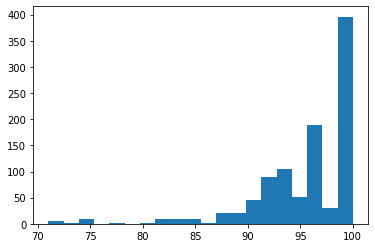

In [221]:
# 100 node 探し
size100_index = []
sizes = []
for i in range(1, 996):
    graph_size = len(np.where(graph_indicator == i)[0])
    if graph_size == 100:
        size100_index.append(i)
    sizes.append(graph_size)

print(len(size100_index))
plt.hist(sizes,bins=20)
plt.show()

index: 1, node: 100, edges: 208


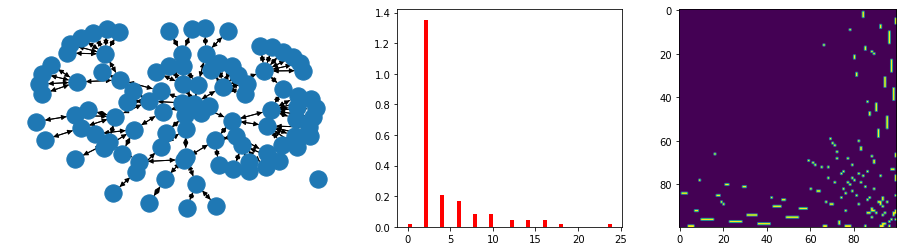

In [215]:
graph_index = size100_index[0]
G = make_graph(graph_index,graph_indicator,edges_list)

fig, axes = plt.subplots(1,3,figsize=(16,4), gridspec_kw={'width_ratios': [1.5,1,1]})
# pos = nx.spring_layout(G, .15)
pos = nx.nx_pydot.graphviz_layout(G)
# pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos,ax=axes[0])
degree_hist(G, ax=axes[1])

mapping = {n:i for i,n in enumerate(list(G.nodes))}
new_G = nx.relabel_nodes(G, mapping)
img = network_to_image(new_G,sort=True)
axes[2].imshow(img)

plt.show()

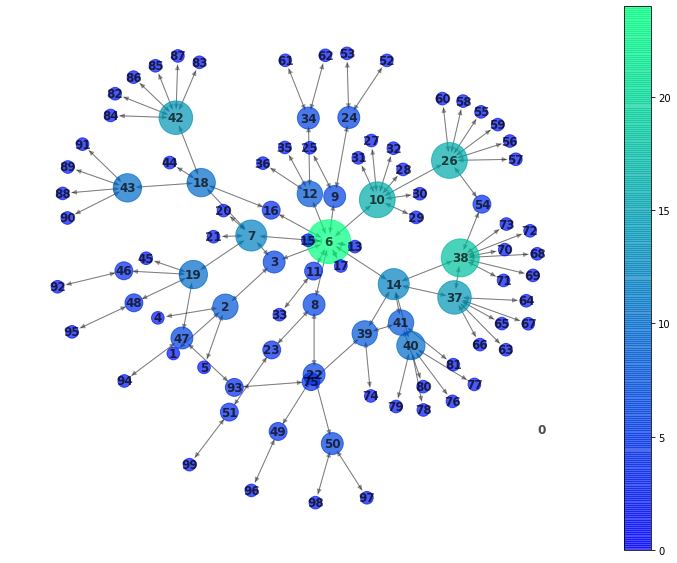

In [220]:
draw_origin(G, pos)